## [LlamaIndex Integration (Instrumentation Module)](https://langfuse.com/guides/cookbook/integration_llama-index_instrumentation)

Use the LlamaIndex Langfuse integration using the instrumentation module by LlamaIndex (available in llama-index v0.10.20 and later).

### Step 0 : Setup

In [ ]:
%pip install "langfuse<3.0.0" llama_index --upgrade

In [1]:
import os

os.environ["LANGFUSE_PUBLIC_KEY"] = "pk-lf-962190cc-b2bd-47c0-b752-8de287a2a5c1"
os.environ["LANGFUSE_SECRET_KEY"] = "sk-lf-4e9959c3-0935-4142-b789-734beb81d15a"
os.environ["LANGFUSE_HOST"] = "http://localhost:3000"

os.environ["OPENAI_API_KEY"] = "73c80b33ad68446ea3f059efe5c1a65f.T2PZjYiHcT2JYx2a"
os.environ["OPENAI_API_BASE"] = "https://open.bigmodel.cn/api/paas/v4"

In [8]:
from llama_index.core import Settings
from langfuse.llama_index import LlamaIndexInstrumentor
from langchain_openai.chat_models import ChatOpenAI
from langchain_openai.embeddings import OpenAIEmbeddings
 
instrumentor = LlamaIndexInstrumentor()
instrumentor.start()

# 初始化嵌入模型
embed_model = OpenAIEmbeddings(
    model="embedding-3",
)

# 初始化 LLM
llm = ChatOpenAI(
    model_name="glm-4.5-flash",
)

# 设置为全局默认
Settings.embed_model = embed_model
Settings.llm = llm

### Step 1: Index

In [9]:
# Example context, thx ChatGPT
from llama_index.core import Document
 
doc1 = Document(text="""
Maxwell "Max" Silverstein, a lauded movie director, screenwriter, and producer, was born on October 25, 1978, in Boston, Massachusetts. A film enthusiast from a young age, his journey began with home movies shot on a Super 8 camera. His passion led him to the University of Southern California (USC), majoring in Film Production. Eventually, he started his career as an assistant director at Paramount Pictures. Silverstein's directorial debut, “Doors Unseen,” a psychological thriller, earned him recognition at the Sundance Film Festival and marked the beginning of a successful directing career.
""")
doc2 = Document(text="""
Throughout his career, Silverstein has been celebrated for his diverse range of filmography and unique narrative technique. He masterfully blends suspense, human emotion, and subtle humor in his storylines. Among his notable works are "Fleeting Echoes," "Halcyon Dusk," and the Academy Award-winning sci-fi epic, "Event Horizon's Brink." His contribution to cinema revolves around examining human nature, the complexity of relationships, and probing reality and perception. Off-camera, he is a dedicated philanthropist living in Los Angeles with his wife and two children.
""")

In [10]:
# Example index construction + LLM query
from llama_index.core import VectorStoreIndex
 
index = VectorStoreIndex.from_documents([doc1,doc2])

Trace ID is not set. Creating generation client with new trace id.
Trace ID is not set. Creating generation client with new trace id.


### Step 2: Query

In [11]:
# Query
response = index.as_query_engine().query("What did he do growing up?")
print(response)

Trace ID is not set. Creating generation client with new trace id.


Growing up, Maxwell Silverstein was passionate about films and began making home movies using a Super 8 camera. His early interest in cinema eventually led him to pursue a career in the film industry.



[Query trace](http://localhost:3000/project/cmcoo14lx0006ph077uy36drf/traces?peek=6b369f2d-f4fd-451a-a988-f73ed41b2942&timestamp=2025-09-04T09%3A51%3A16.354Z&observation=LangChainLLM.predict-2f9ffd40-4560-4457-8ead-db05b74dfec6)


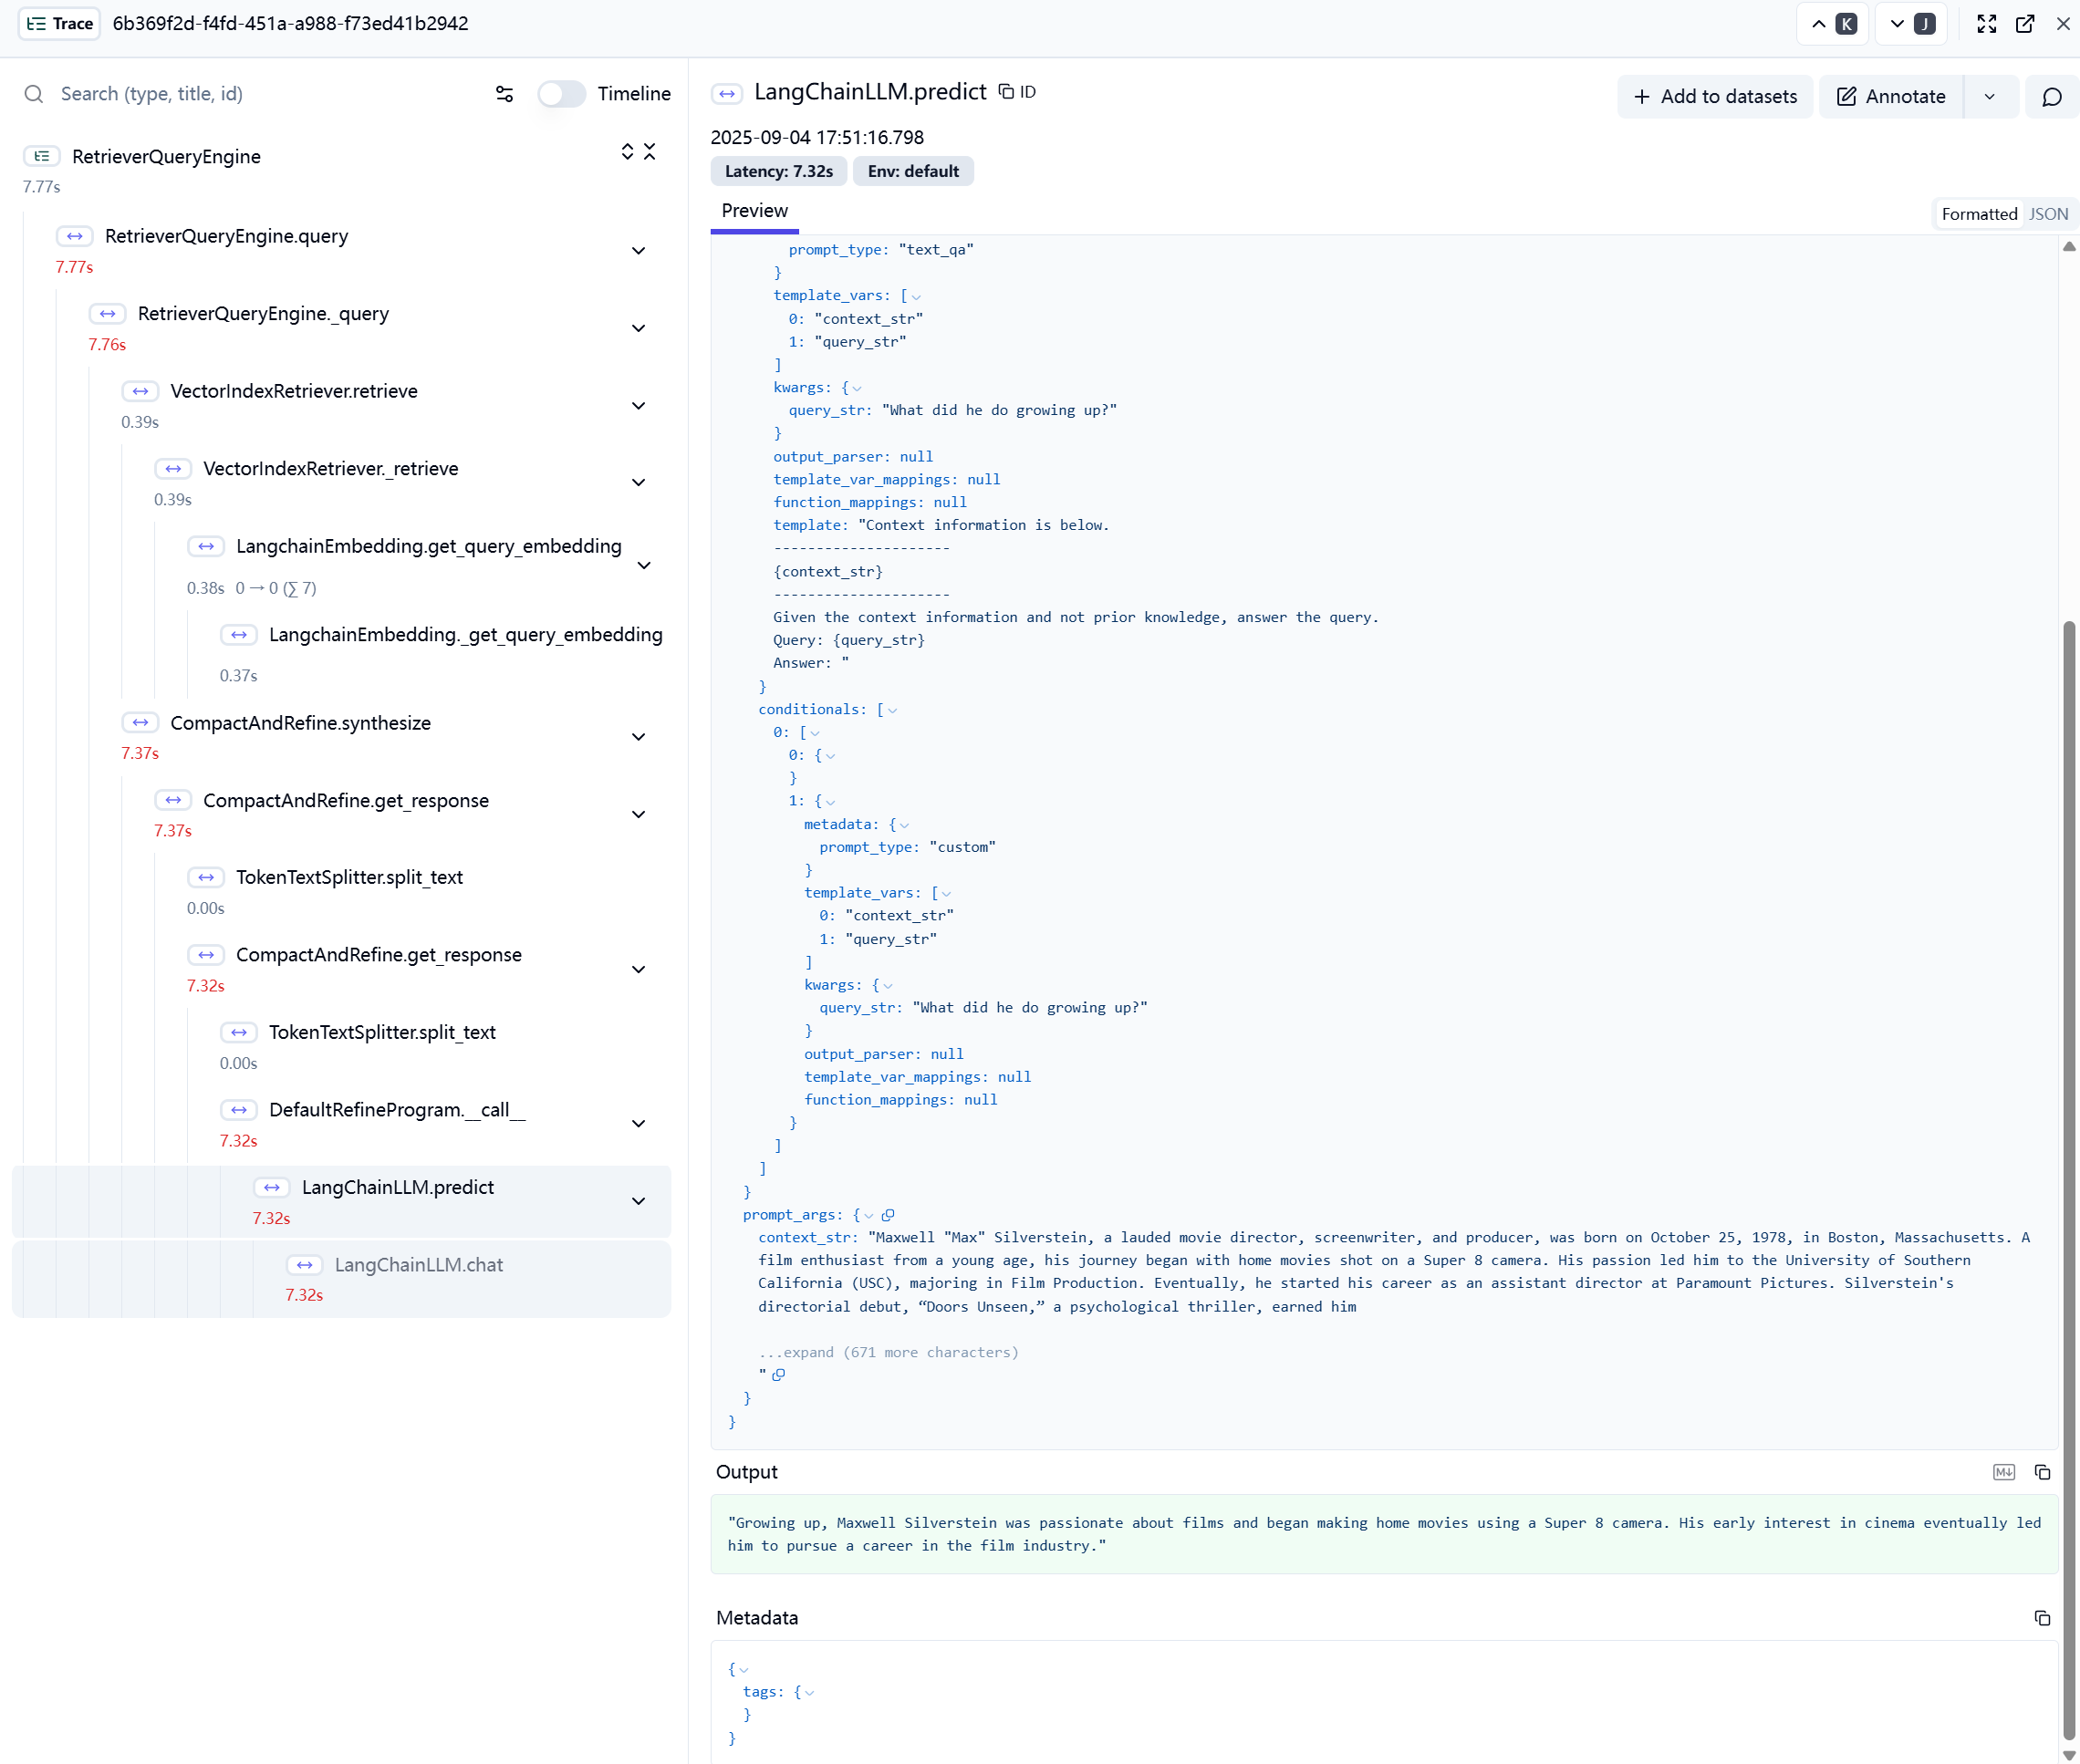

In [13]:
# Chat
response = index.as_chat_engine().chat("What did he do growing up?")
print(response)

Trace ID is not set. Creating generation client with new trace id.



Based on the documents, Maxwell Silverstein was a film enthusiast from a young age. His journey in film began with making home movies shot on a Super 8 camera. This early passion for filmmaking eventually led him to pursue film production at the University of Southern California and start his career in the movie industry.


[Chat trace](http://localhost:3000/project/cmcoo14lx0006ph077uy36drf/traces?peek=6b3c461b-4ad9-4b6b-85ca-cdc25c9d3e6e&timestamp=2025-09-04T09%3A51%3A36.077Z&observation=CompactAndRefine.get_response-1b50ec65-3d3d-4e9a-9143-154aa3868aa0)

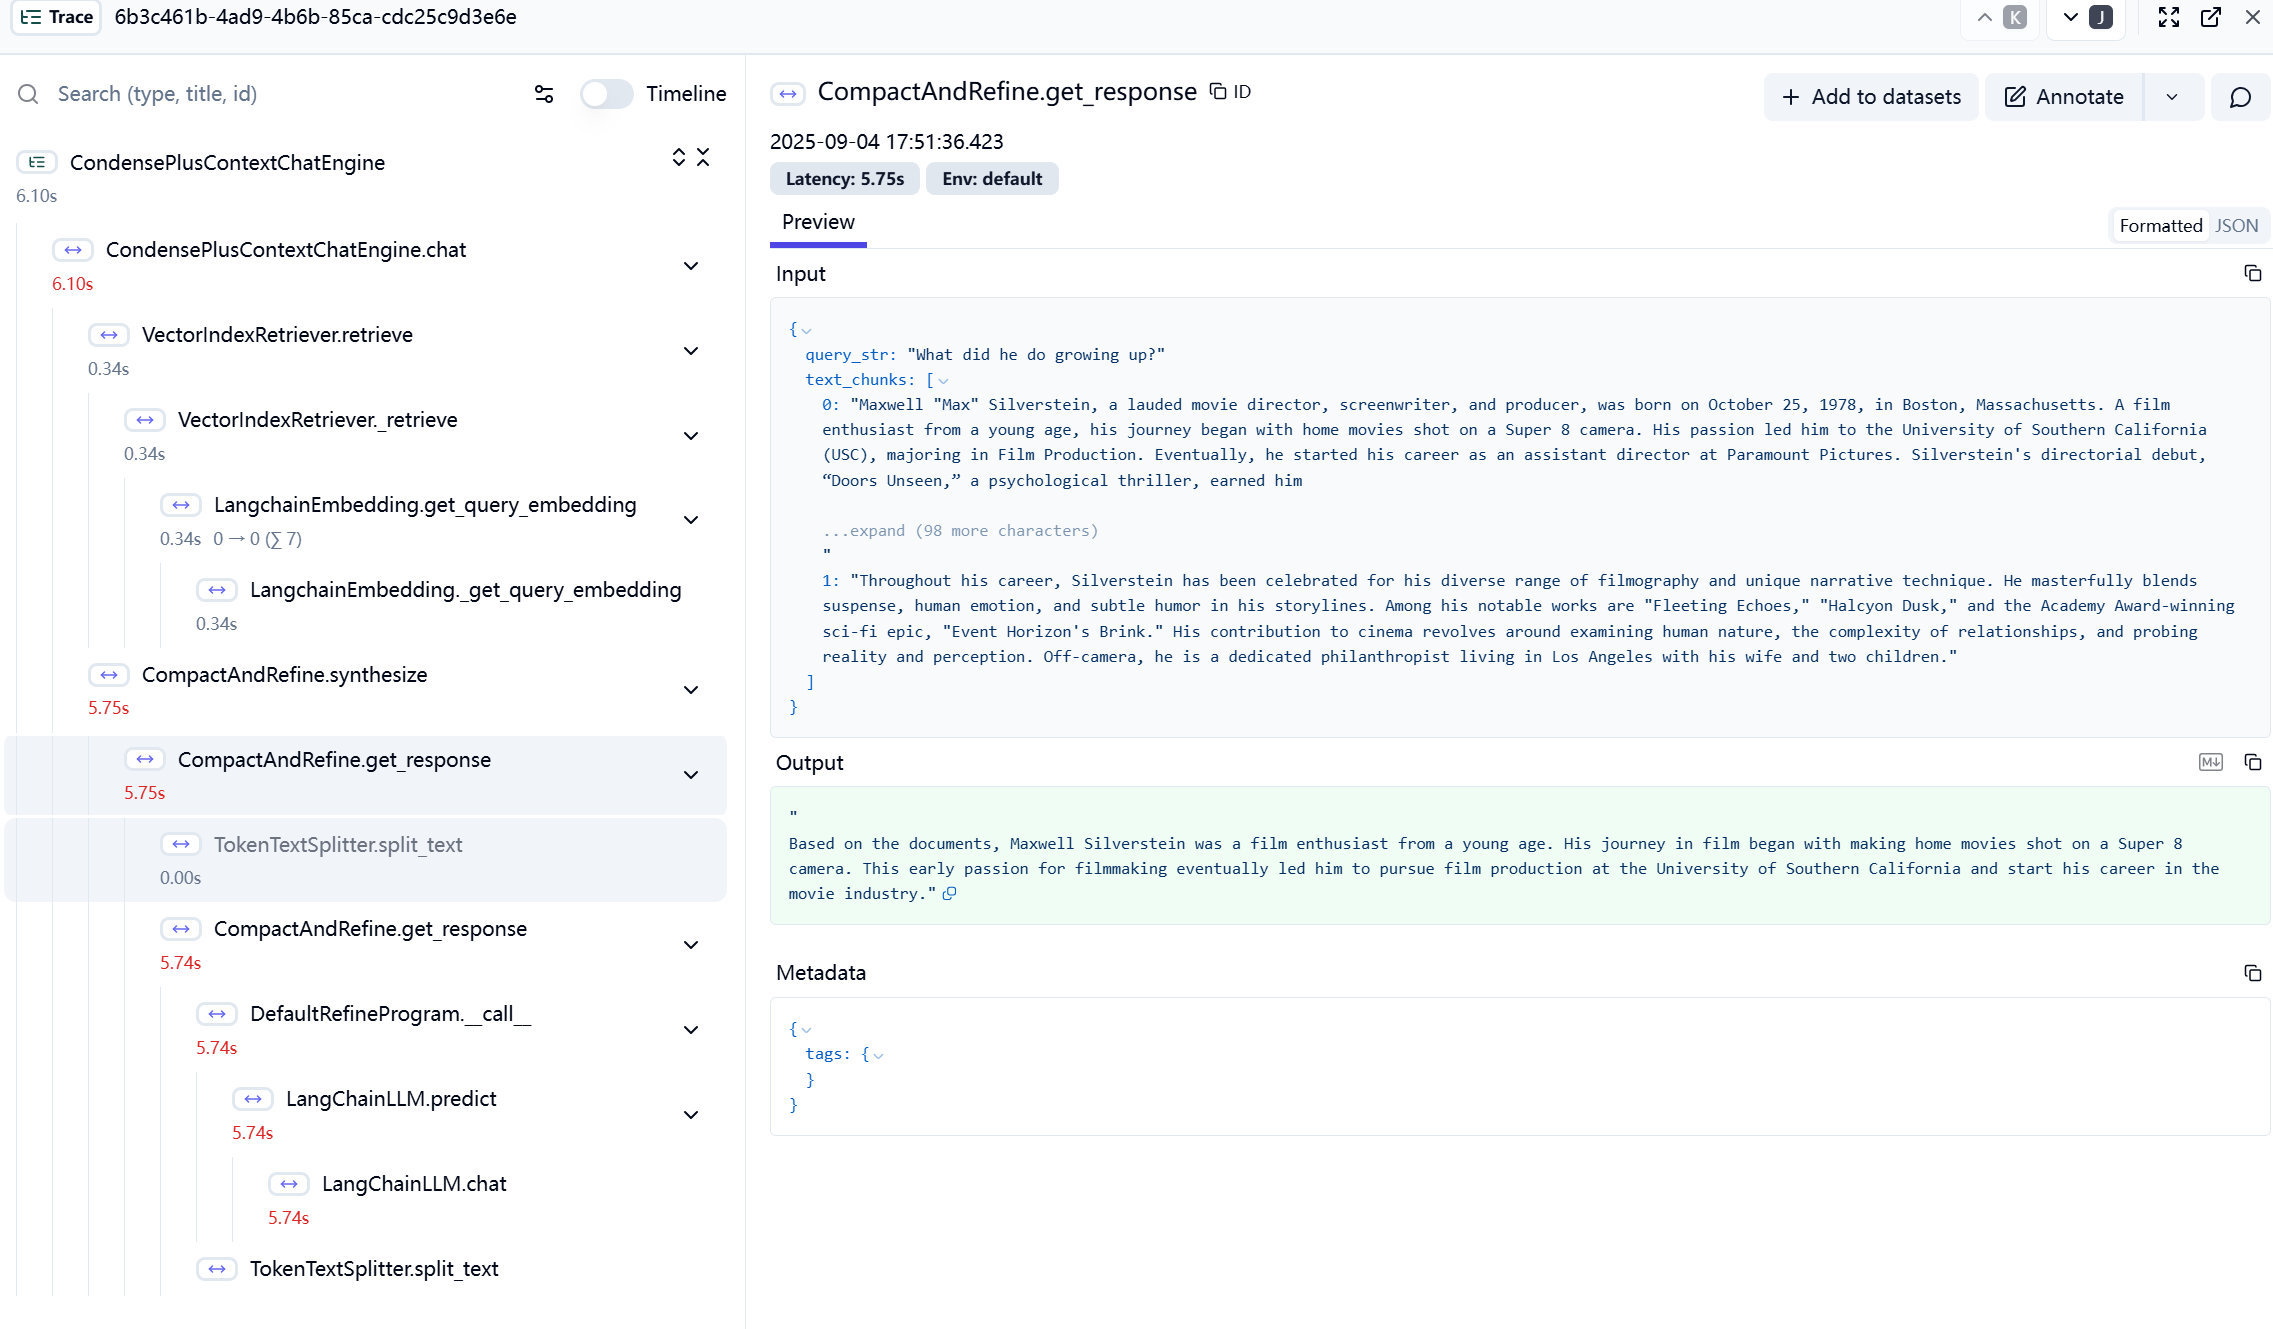

In [ ]:
%pip install langfuse --upgrade

In [1]:
from langfuse import get_client
 
langfuse = get_client()

In [ ]:
# Summarize cost by model
import pandas as pd

trace = langfuse.api.trace.get("6b3c461b-4ad9-4b6b-85ca-cdc25c9d3e6e")
observations = trace.observations


def summarize_usage(observations):
    """Summarize usage data grouped by model."""
    usage_data = []

    for obs in observations:
        usage = obs.usage
        if usage:
            usage_data.append(
                {
                    "model": obs.model,
                    "input_tokens": usage.input,
                    "output_tokens": usage.output,
                    "total_tokens": usage.total,
                }
            )

    df = pd.DataFrame(usage_data)
    if df.empty:
        return pd.DataFrame()

    summary = df.groupby("model").sum()
    return summary


# Example usage (assuming `observations` is defined as in the provided code):
summary_df = summarize_usage(observations)
summary_df

,input_tokens,output_tokens,total_tokens
model,,,
embedding-3,0,0,7


: 